## Task 4.9
## Part 2

### Step 1 - Import necessary analysis and visualization libraries


In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings("ignore")

### Step 2 - Import your most up-to-date project data


In [4]:
# Path to the data
path = r'C:\\Users\\mshhan\\Documents\\05-2024 Instacart Basket Analysis'
data_file = os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_aggregated.pkl')

# Load the data
df = pd.read_pickle(data_file)

# Display the first few rows of the dataframe
df.head()


,order_id,user_id,order_number,day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge_existing,...,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


### Step 3 - Create a histogram of the “order_hour_of_day” column


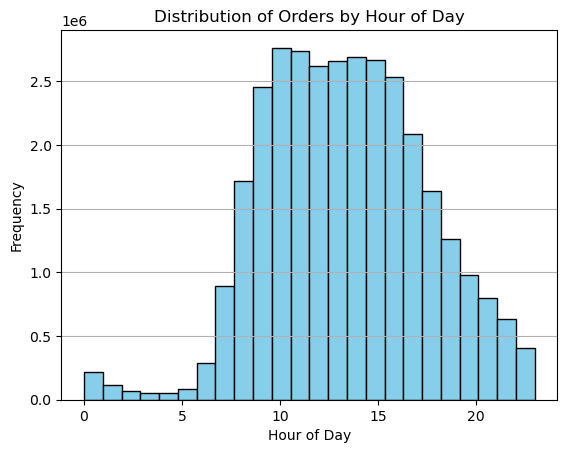

In [5]:
# Create a histogram for the 'order_hour_of_day' column
hist_order_hour = df['order_hour_of_day'].plot.hist(bins=24, color='skyblue', edgecolor='black')
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Save the histogram
hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))



The histogram shows the distribution of orders throughout the day, indicating peak order times. 
It helps in understanding customer behavior and identifying the most popular hours for placing orders.


### Step 4 - Create a bar chart from the “loyalty_flag” column


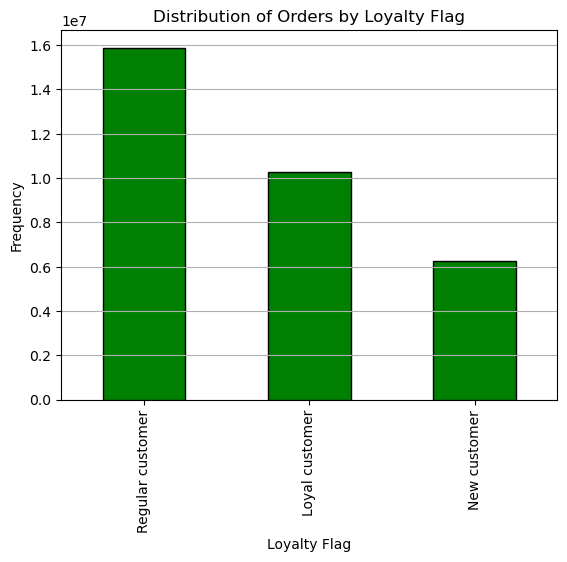

In [6]:
# Create a bar chart for the 'loyalty_flag' column
bar_loyalty_flag = df['loyalty_flag'].value_counts().plot.bar(color='green', edgecolor='black')
plt.title('Distribution of Orders by Loyalty Flag')
plt.xlabel('Loyalty Flag')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Save the bar chart
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))


The bar chart displays the distribution of orders among customers based on their loyalty status. 
It provides insights into the proportion of orders from loyal, regular, and new customers.


### Step 5 - Create a line chart to check the difference in expenditure (the “prices” column) depending on the hour of the day


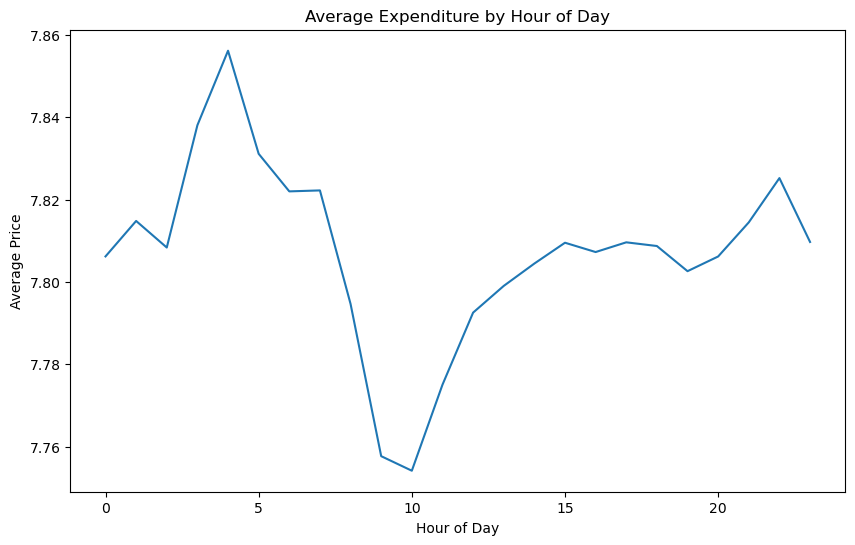

In [7]:
# Create a representative sample for the line chart
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7
big_sample = df[dev]
small_sample = df[~dev]

df['prices'] = df['prices'].apply(lambda x: np.nan if x > 100 else x)

# Drop rows with NaN values in 'prices' or 'order_hour_of_day'
df_clean = df.dropna(subset=['prices', 'order_hour_of_day'])

# Create a sample for plotting to avoid memory errors
np.random.seed(4)
sample = np.random.rand(len(df_clean)) <= 0.7
df_sample = df_clean[sample]

# Plot the line chart for average prices by hour of the day
line_prices_hour = plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sample, x='order_hour_of_day', y='prices', ci=None)
plt.title('Average Expenditure by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price')
plt.show()

# Save the line chart
line_prices_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_hour.png'))


The line chart shows the average expenditure at different hours of the day, highlighting the variation in spending patterns throughout the day. 
This can help in identifying the peak hours of high expenditure.


### Step 6 - Create a line chart exploring the connections between age and number of dependents


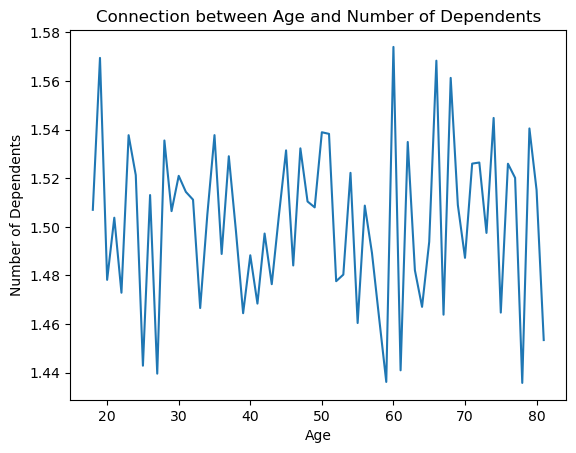

In [8]:
# Create a line chart for age and number of dependents
line_age_dependents = sns.lineplot(data=df, x='age', y='n_dependants', ci=None)
plt.title('Connection between Age and Number of Dependents')
plt.xlabel('Age')
plt.ylabel('Number of Dependents')

# Save the line chart
line_age_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependents.png'))


The line chart illustrates the relationship between a customer's age and the number of dependents they have. 
It provides insights into family situations across different age groups.


### Step 7 - Create a scatterplot to explore the connection between age and spending power (income)


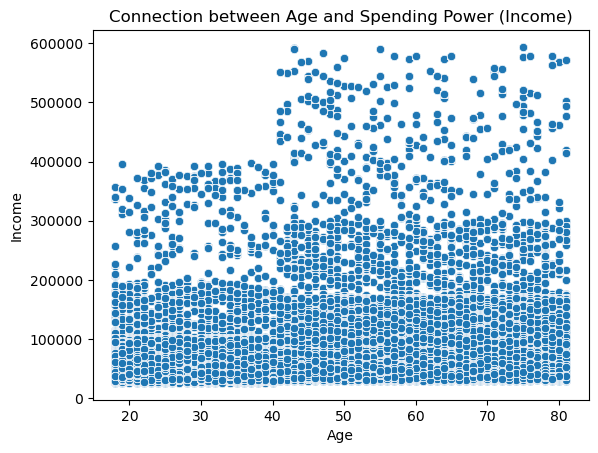

In [9]:
# Create a scatterplot for age and income
scatter_age_income = sns.scatterplot(data=df, x='age', y='income')
plt.title('Connection between Age and Spending Power (Income)')
plt.xlabel('Age')
plt.ylabel('Income')

# Save the scatterplot
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))


The scatterplot shows the relationship between a customer's age and their income, highlighting spending power across different age groups. 
This visualization helps in understanding the correlation between age and income levels.
